# **AdvStat4PhysAna - RLab 1**

**Barone Francesco Pio**, 24 march 2022

Student ID: 2058478

In this notebook (clickable links in Jupyter):
1) [vectors and dataframes](#exr1)
2) [crude oil production](#exr2)
3) [world coal production](#exr3)
4) [Covid 19 data](#exr4)

***

<a id='exr1'></a>
## **EXR01** - vectors and dataframes

#### **0** - populating the dataframe

In [1]:
# I take the data from the table in assignment pdf

lake <- c('Ness','Lomond','Morar','Tay','Awe','Maree','Ericht',
          'Lochy','Rannoch','Shiel','Katrine','Arkaig','Shin')
# I put the Loch prefix this way, once for all:
lake <- paste0('Loch ', lake) 

volume <- c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)
area <- c(56,71,27,26.4,39,28.6,18.6,16,19,19.5,12.4,16,22.5)
length <- c(39,36,18.8,23,41,20,23,16,15.7,28,12.9,19.3,27.8)
max_depth <- c(230,190,310,150,94,114,156,162,134,128,151,109,49)
mean_depth <- c(132,37,87,60.6,32,38,57.6,70,51,40,43.4,46.5,15.5)

d1 <- data.frame(lake, volume, area, length, max_depth, mean_depth)
d1

lake,volume,area,length,max_depth,mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


#### **1** - evaluate the highest and lowest volume and area lake

In [2]:
first_and_last <- c(1, nrow(d1))  # indexes of first and last element

# take the first and last element of the sorted data (by area and volume)
d1[ order(d1$area, decreasing=TRUE)[first_and_last], c('lake','area') ]      # area
d1[ order(d1$volume, decreasing=TRUE)[first_and_last], c('lake','volume') ]  # volume

# we can eventually take the values from the dataframe and put them into variables

,lake,area
,<chr>,<dbl>
2,Loch Lomond,71.0
11,Loch Katrine,12.4


,lake,volume
,<chr>,<dbl>
1,Loch Ness,7.45
13,Loch Shin,0.35


Therefore, the largest (by area) lake is Loch Lomond, while the smallest is Loch Katrine. The largest volume belongs to Loch Ness, and the smallest to Loch Shin.

#### **2** - order the frame with respect to the area and determine the two largest area lakes

In [3]:
d1_sorted_area <- d1[ order(d1$area, decreasing = TRUE), ]

#  order(d1$area, decreasing = TRUE)
#   ^^ This instruction returns a vector with the indexes of 
#     the 'area' column sorted in decreasing order.
n <- 2  # how many lakes do you want to print?

cat('The', n,'largest lakes are:\n') # printing the answer in a nice way
for( i in 1:n)
    cat(' ', d1_sorted_area$lake[i], '(', d1_sorted_area$area[i]  ,'Km^2 )\n')

The 2 largest lakes are:
  Loch Lomond ( 71 Km^2 )
  Loch Ness ( 56 Km^2 )


#### **3** - by summing up the areas occupied by the lakes, determine the area of Scotland covered by water

In [4]:
water_area <- sum( d1$area )
cat('The area occupied by water is', water_area, 'Km^2')

The area occupied by water is 372 Km^2

***

<a id='exr2'></a>
## **EXR02** - crude oil production

#### **1** - IO

Checking the file, I see that data is separated using a comma, and there is a comment on the title line which is marked by a dash `-`.

In [5]:
d2 <- read.csv('data/crude-oil-prices.csv', comment.char='-')
d2

Entity,Code,Year,Oil
<chr>,<chr>,<int>,<dbl>
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74
World,OWID_WRL,1867,2.41
World,OWID_WRL,1868,3.63
World,OWID_WRL,1869,3.64


#### **2** - plot of Oil price as function of the year

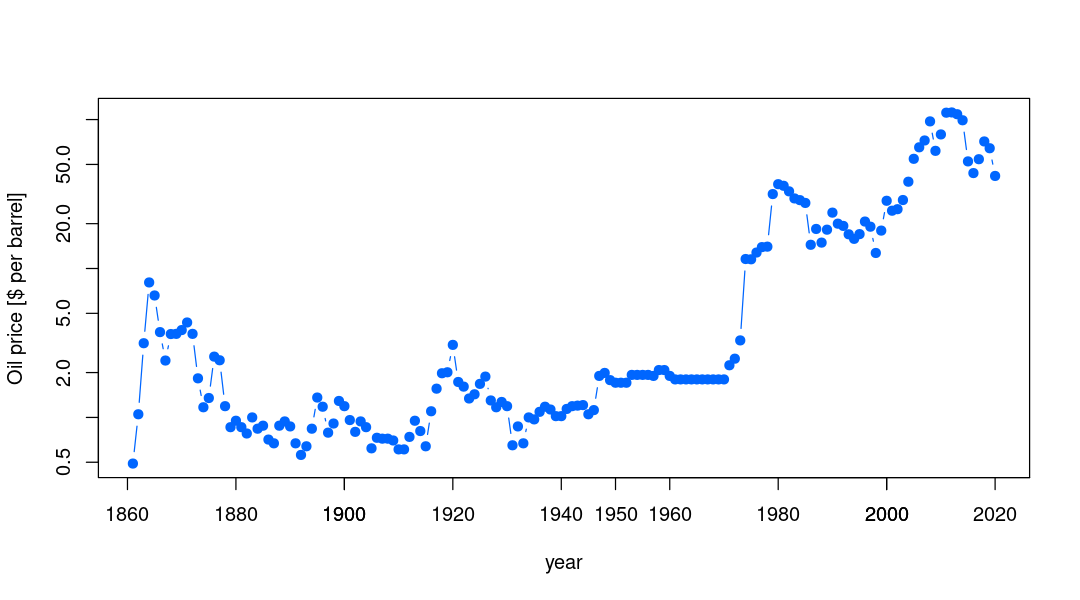

In [6]:
options(repr.plot.width=9, repr.plot.height=5)
plot(d2$Year, d2$Oil, type="b", pch=19, lwd=1, col="#0066FF", 
     xlab="year", ylab="Oil price [$ per barrel]", log='y')
axis(side=1, seq(1860, 2040,20))
#  I think that a logarithmic scale on y is better for this data visualization,
# since the prices of the last 40 years are much higher than before.

#### **3** - highest price in history

In [7]:
max_id <- which.max(d2$Oil)
cat('The highest price occurred in',d2$Year[max_id],', at',d2$Oil[max_id],'$/barrel') 

The highest price occurred in 2012 , at 111.6697 $/barrel

#### **4** - (discrete) derivative of the curve

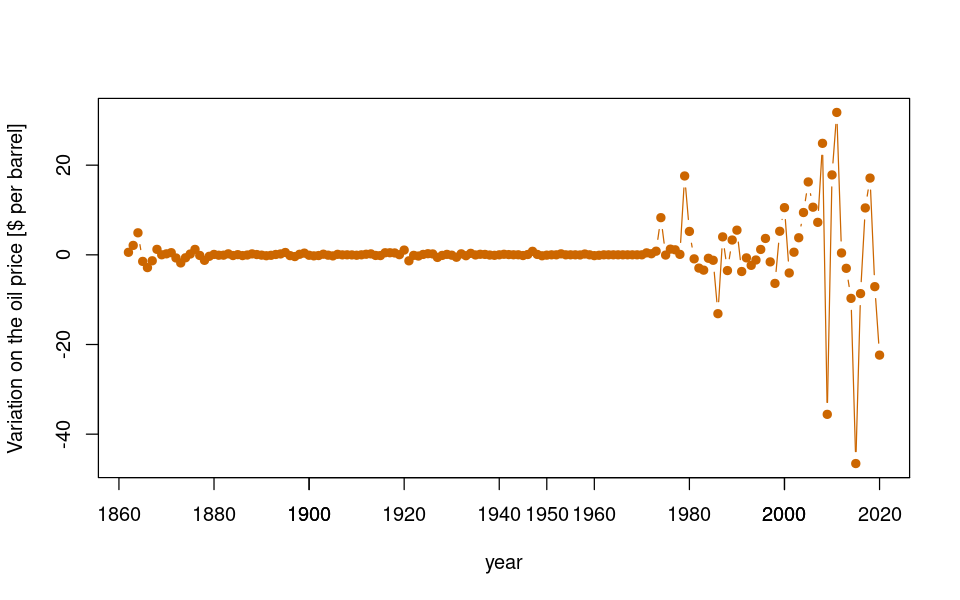

In [8]:
deriv <- diff(d2$Oil)

options(repr.plot.width=8, repr.plot.height=5)
plot(d2$Year[-1], deriv, type="b", pch=19, lwd=1, col="#CC6600", cex=0.9,
     xlab="year", ylab="Variation on the oil price [$ per barrel]")
axis(side=1, seq(1860, 2040,20))

***

<a id='exr3'></a>
## **EXR03** - world coal production

#### **1** - IO

In [9]:
d3 <- read.csv('data/coal-production-by-country.csv', comment.char='(')
names(d3)[names(d3) == 'Coal.production'] <- 'Production'
d3

Entity,Code,Year,Production
<chr>,<chr>,<int>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


Looking at the data, I notice that there are some entries without any value in 'Code'. These entries correspond to lable which aggregate one or more country, usually by geographic area. So, for the purpose of the exercise I will extract only the actual countries, unless otherwise specified.

In [10]:
fil <- d3[ d3$Code == '', ]
unique(fil$Entity)

[1] "Africa"                        "Asia Pacific"                 
 [3] "Asia and Oceania"              "Burma"                        
 [5] "CIS"                           "Central and South America"    
 [7] "EU-28"                         "Eurasia"                      
 [9] "Europe"                        "Europe "                      
[11] "Inde"                          "Ivory Coast"                  
[13] "Macau"                         "Middle East"                  
[15] "North America"                 "OECD"                         
[17] "OPEC"                          "Other Africa"                 
[19] "Other Asia & Pacific"          "Other CIS"                    
[21] "Other S. & Cent. America"      "Persian Gulf"                 
[23] "South & Central America"       "United States Pacific Islands"

In [11]:
d3_countries <- d3[ ! d3$Code == '' , ]
d3_countries <- d3_countries[ ! d3_countries$Code == 'OWID_WRL' , ]  # also remove the 'World', for now...

#### **2** - unique countries and number of entries

In [12]:
str(d3_countries)
cat('\n\nThere are', length(unique(d3_countries$Entity)), 'unique countries.')

'data.frame':	9646 obs. of  4 variables:
 $ Entity    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Code      : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ Year      : int  1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 ...
 $ Production: num  0 0 0 0 0 0 0 0 0 0 ...


There are 175 unique countries.

To set the properties of this plot, I used the informations in [this](https://www.rstudio.com/wp-content/uploads/2016/10/how-big-is-your-graph.pdf) pdf.
TO backup the plot environment, use
```R
tmp <- par(no.readonly = TRUE)
par(tmp)
```

There are 175 unique countries (another way).

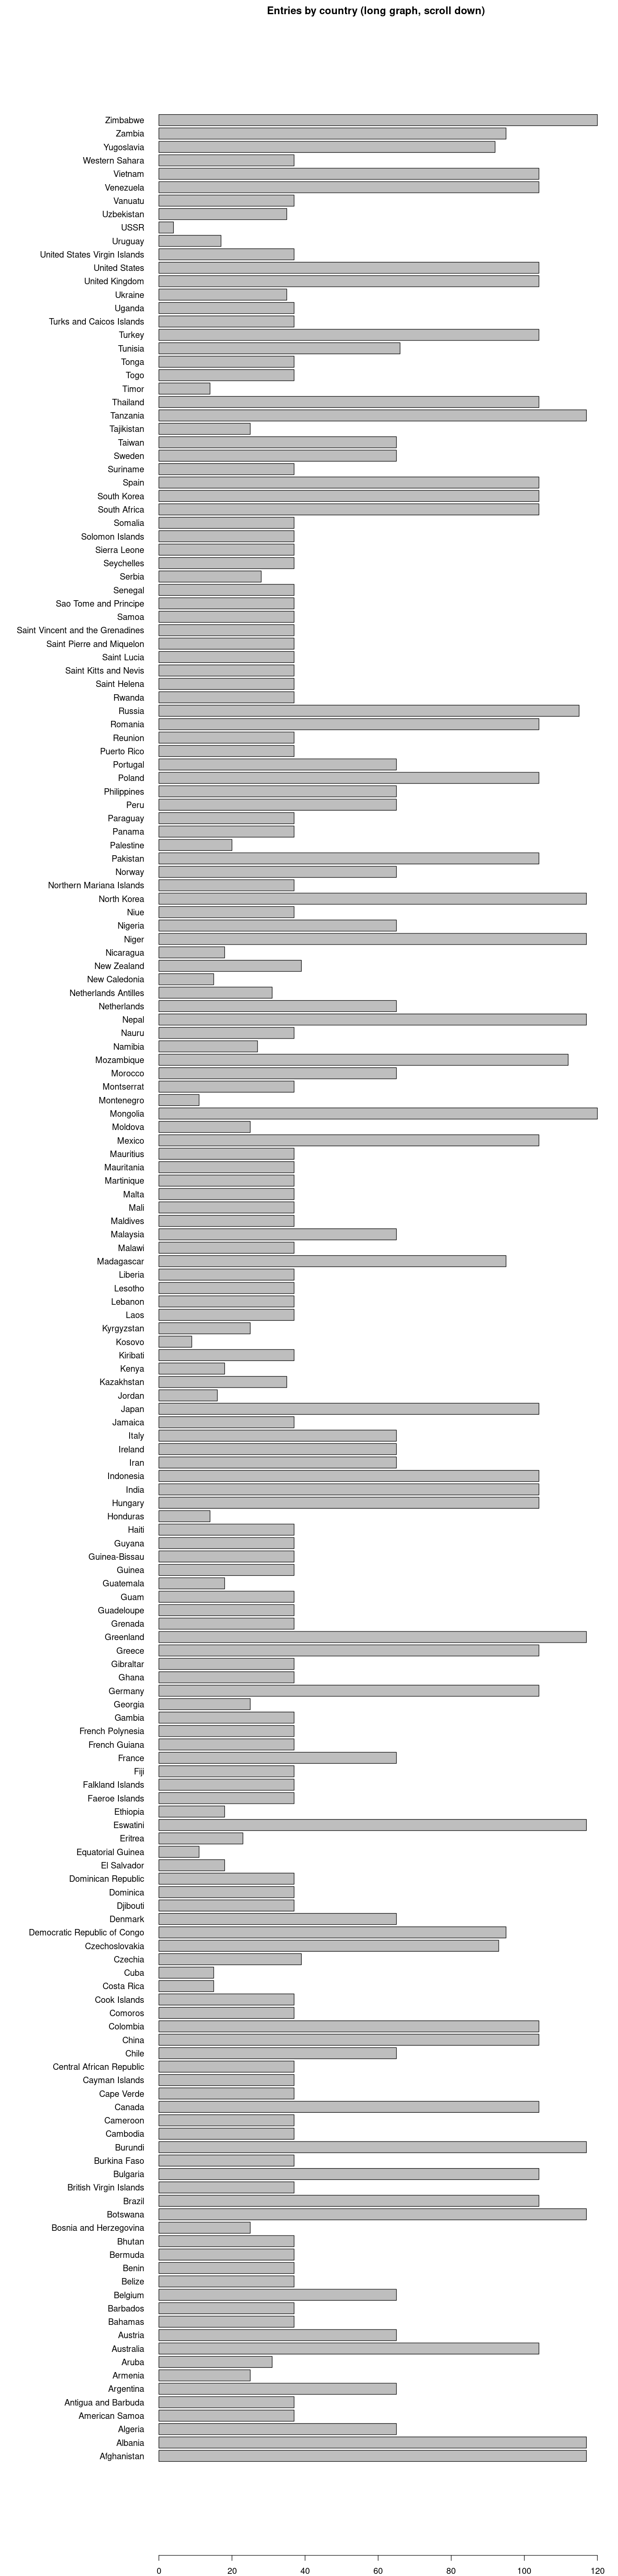

In [13]:
# this is another way to get the unique number of countries and
occ <- table(d3_countries$Entity)
cat('There are', length(occ), 'unique countries (another way).')

parbak <- par(no.readonly = TRUE) # backup of plot env

par(mar=c(2,15,2,2))
options(repr.plot.width=12, repr.plot.height=50)
barplot(occ, horiz=TRUE, las=1, xlab='entries', main="Entries by country (long graph, scroll down)")

par(parbak) #restore plot env

From now only we select only **data starting from 1970**.

#### **3** - top 5 countries for total integrated production

In [14]:
d3s <- d3_countries[ d3_countries$Year >= 1970, ]  # selecting data from 1970
head(d3s)

,Entity,Code,Year,Production
,<chr>,<chr>,<int>,<dbl>
71,Afghanistan,AFG,1970,1.335
72,Afghanistan,AFG,1971,1.099
73,Afghanistan,AFG,1972,0.578
74,Afghanistan,AFG,1973,0.952
75,Afghanistan,AFG,1974,0.936
76,Afghanistan,AFG,1975,1.221


In [15]:
# this is a one-line way to compute the sum
d3_total <- aggregate(d3s$Production, by=list(d3s$Entity), FUN=sum, na.rm = TRUE)
head(d3_total)

,Group.1,x
,<chr>,<dbl>
1,Afghanistan,83.102
2,Albania,101.490
3,American Samoa,0.000
4,Antigua and Barbuda,0.000
5,Armenia,0.000
6,Aruba,0.000


In [16]:
# If you like to check manually, use the following line (pick a specific country...)
sum( d3s[ d3s$Entity == 'Albania', ]['Production'] , na.rm = TRUE)

[1] 101.49

In [17]:
top5 <- d3_total[ order(d3_total$x, decreasing = TRUE), ][1:5,]
cat('The top 5 countries for coal production from 1970:')
top5

top5_names <- top5[,1]  # taking the names only, for the next point of the exercise

The top 5 countries for coal production from 1970:

,Group.1,x
,<chr>,<dbl>
27,China,459564.65
143,United States,226068.84
113,Russia,101908.49
7,Australia,83077.07
66,India,77043.45


#### **4** - production vs time for the top 5 countries

In [18]:
top5_names  # computed in the previous cell
top5df <- d3s[ d3s$Entity == top5_names, ]

[1] "China"         "United States" "Russia"        "Australia"    
[5] "India"

In [19]:
#split(top5df, top5df$Entity)
top5df


,Entity,Code,Year,Production
,<chr>,<chr>,<int>,<dbl>
824,Australia,AUS,1985,1074.347
829,Australia,AUS,1990,1334.602
834,Australia,AUS,1995,1591.819
839,Australia,AUS,2000,1996.821
844,Australia,AUS,2005,2501.290
849,Australia,AUS,2010,2914.792
854,Australia,AUS,2015,3555.705
2444,China,CHN,1981,3614.607
2449,China,CHN,1986,5198.614


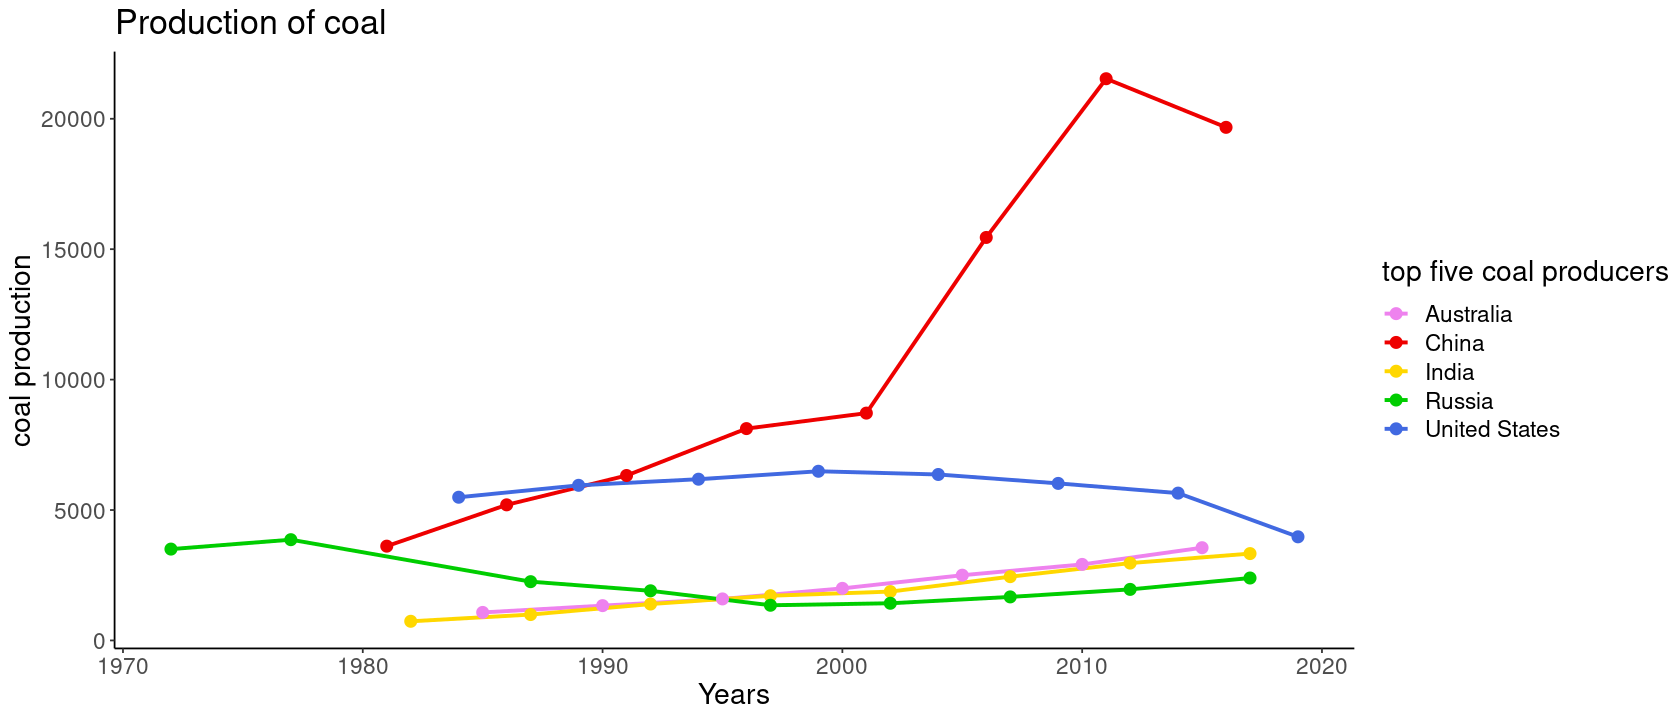

In [20]:
clr <- c('violet','red2','gold','green3','royalblue')

library(ggplot2)

set_wid <- 14
set_hei <- 6

options(repr.plot.width=set_wid, repr.plot.height=set_hei)

ggplot(data=top5df, aes(x=Year, y=Production, color=Entity)) +
        ggtitle("Production of coal") +
        scale_color_manual(name = "top five coal producers", values = clr) +
        geom_path(size=1.1)+
        geom_point(size=3) +
        theme_classic()+
        labs(x = "Years",y="coal production") +
        theme(text = element_text(size = 17))


#### **5** - world comulative production over the years

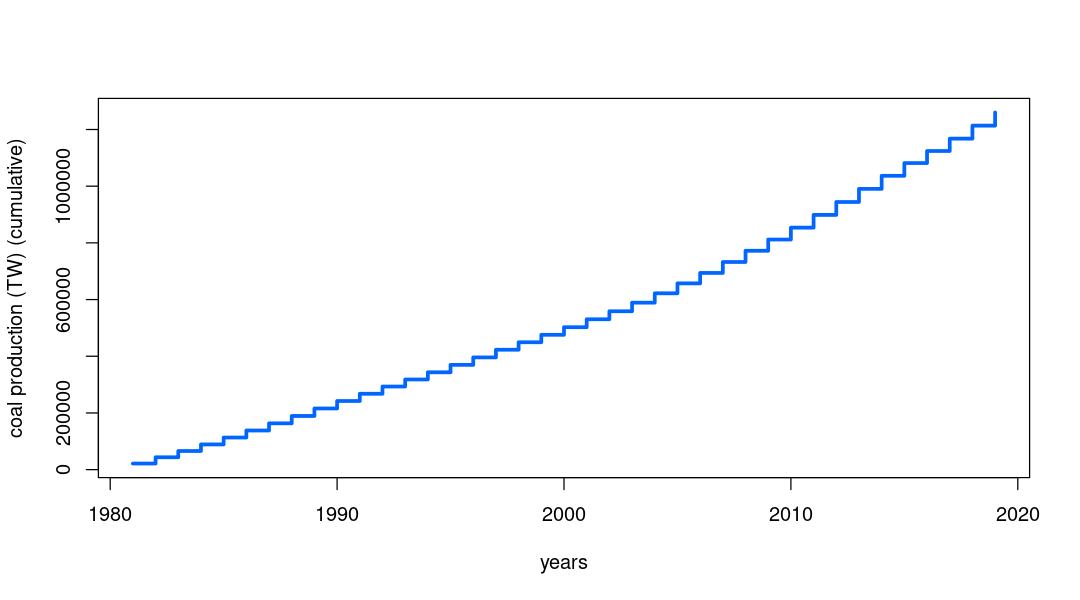

In [21]:
d3_world <- d3[ d3$Entity == 'World' , ]

options(repr.plot.width=9, repr.plot.height=5)
plot(d3_world$Year, cumsum(d3_world$Production), type="s",  lwd=3, col="#0066FF", 
     xlab="years", ylab="coal production (TW) (cumulative)")

***

<a id='exr4'></a>
## **EXR04a** - Covid19 vaccine data

#### **0** - IO

In [22]:
library(readr)  # to use read_csv
library(purrr)  # to use the redirect %>%
d4 <- read_csv('data/vaccinations-by-manufacturer.csv')
d4

Rows: 35345 Columns: 4
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): location, vaccine
dbl  (1): total_vaccinations
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Argentina,2020-12-29,Moderna,2
Argentina,2020-12-29,Oxford/AstraZeneca,3
Argentina,2020-12-29,Sinopharm/Beijing,1
Argentina,2020-12-29,Sputnik V,20481
Argentina,2020-12-30,Moderna,2
Argentina,2020-12-30,Oxford/AstraZeneca,3
Argentina,2020-12-30,Sinopharm/Beijing,1
Argentina,2020-12-30,Sputnik V,40583
Argentina,2020-12-31,Moderna,2


#### **1** - select Italy

In [23]:
d4_ita <- d4 %>% dplyr::filter(location == 'Italy')
# or equivalently   dplyr::filter(d4, total_vaccinations > 5)
d4_ita

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Italy,2020-12-27,Moderna,2
Italy,2020-12-27,Pfizer/BioNTech,7347
Italy,2020-12-28,Moderna,6
Italy,2020-12-28,Pfizer/BioNTech,8848
Italy,2020-12-29,Moderna,11
Italy,2020-12-29,Pfizer/BioNTech,9942
Italy,2020-12-30,Moderna,22
Italy,2020-12-30,Pfizer/BioNTech,14816
Italy,2020-12-31,Pfizer/BioNTech,40763


#### **2** - number of vaccines by manufacturer

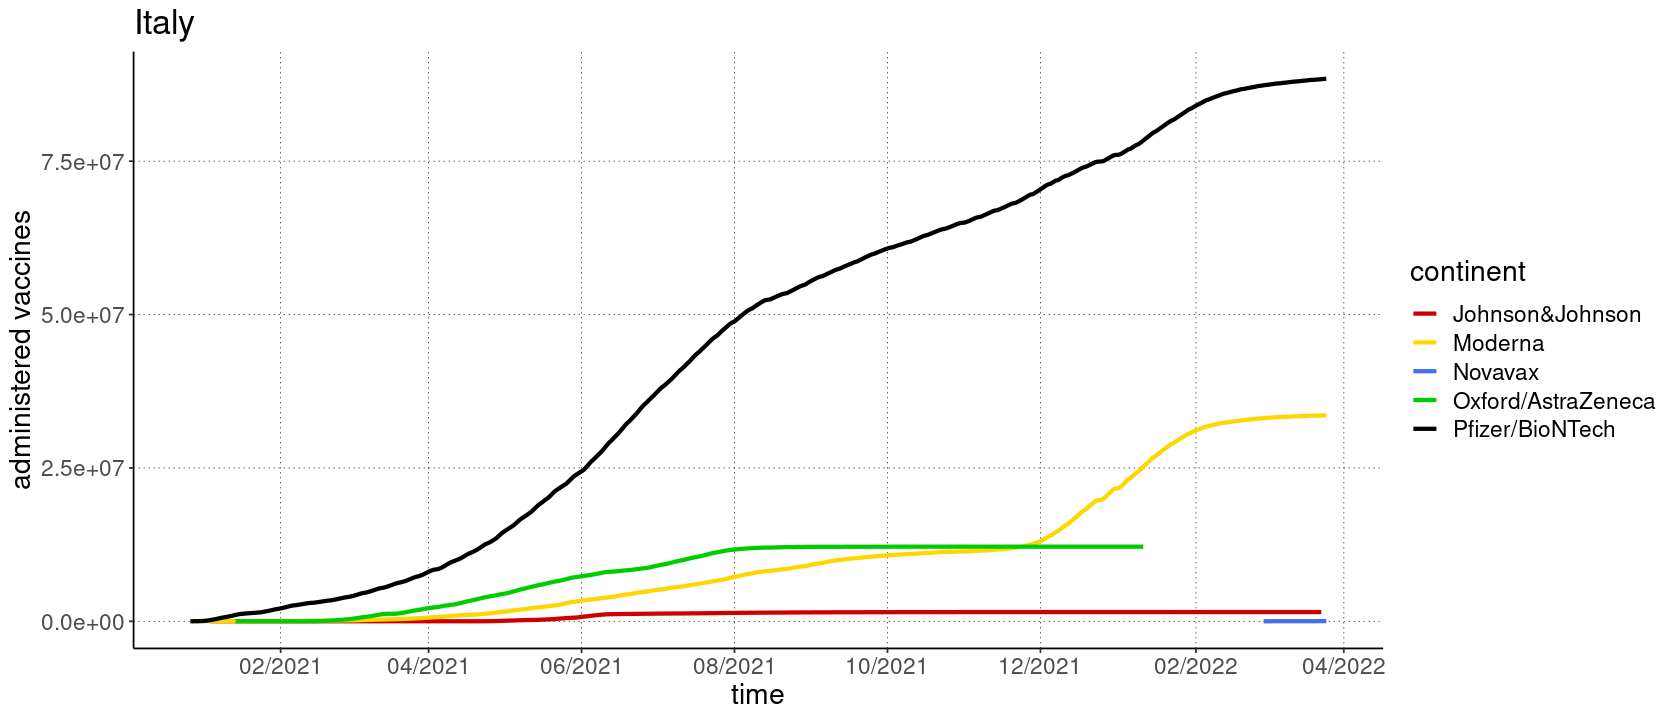

In [24]:
library(ggplot2)

set_wid <- 14
set_hei <- 6

options(repr.plot.width=set_wid, repr.plot.height=set_hei)

ggplot(data=d4_ita, aes(x=date, y=total_vaccinations, color=vaccine)) +
        ggtitle("Italy") +
        scale_color_manual(name = "continent", values = c('red3','gold','royalblue2','green3','black')) +
        geom_line(size=1.2) +
        theme_classic()+#theme_bw() +
        labs(x = "time",y="administered vaccines") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        #scale_y_continuous(trans='log10') + # the logaritmic scale is better to see the initial values
        theme(text = element_text(size = 17))

#### **3** - total vaccines shot per day in Italy

To do the cumulative sum, I must check that the dataframe I am using actually contains a row for each day. Some collegues have showed me that this does not happen for some set of data. To address this issue, I will use a vectorial function to 'complete' the dataframe with all the days. To convince you that this works correctly, I will intentionally crop the original data to have only 5 days. Then, I will fill the dataframe with all the days, filling the empty values by zeros.

In [25]:
# take the sum for all vaccines manufacturers (take only the first 5 of them)
d4_all <- head(aggregate(d4_ita$total_vaccinations, by=list(time=d4_ita$date), FUN=sum), n=5)

# create a vector for all the days in the range of the data
full_days <- seq(head(d4_ita, n=1)$date,tail(d4_ita, n=1)$date,"1 day")

# fill the gaps!
d4_all_filled <- tidyr::complete(d4_all, time = full_days, fill = list(x = 0))

d4_all
head(d4_all_filled, n = 10)

,time,x
,<date>,<dbl>
1,2020-12-27,7349
2,2020-12-28,8854
3,2020-12-29,9953
4,2020-12-30,14838
5,2020-12-31,40763


time,x
<date>,<dbl>
2020-12-27,7349
2020-12-28,8854
2020-12-29,9953
2020-12-30,14838
2020-12-31,40763
2021-01-01,0
2021-01-02,0
2021-01-03,0
2021-01-04,0


Now I will apply the technique to the full (not intentionally cropped) data.

In [26]:
# take the sum for all vaccines manufacturers (take only the first 5 of them)
d4_all <- aggregate(d4_ita$total_vaccinations, by=list(time=d4_ita$date), FUN=sum)

# create a vector for all the days in the range of the data
full_days <- seq(head(d4_ita, n=1)$date,tail(d4_ita, n=1)$date,"1 day")

# fill the gaps!
d4_all_filled <- tidyr::complete(d4_all, time = full_days, fill = list(x = 0))

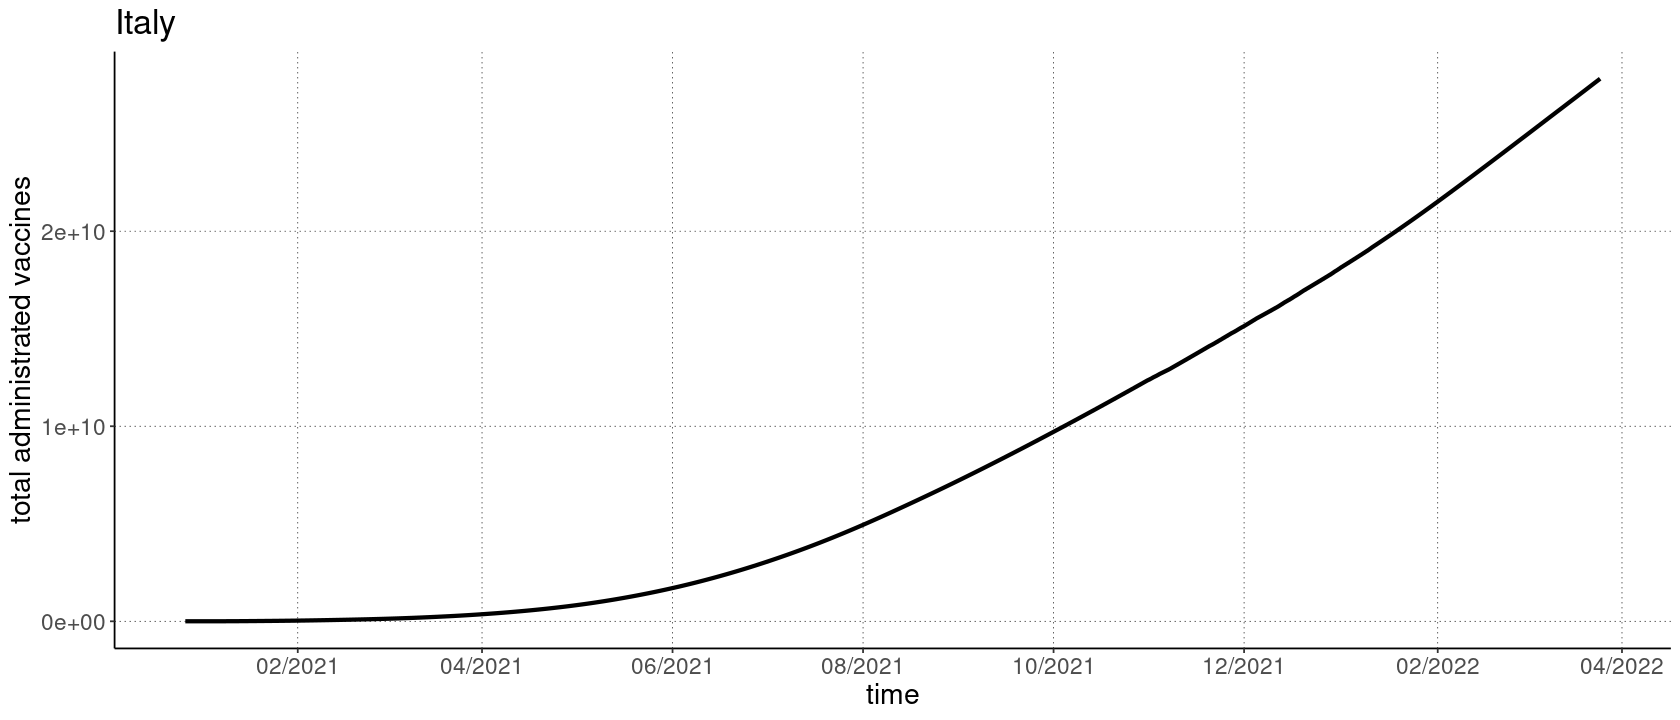

In [27]:
options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot(data=d4_all_filled, aes(x=time, y=cumsum(x))) +
        ggtitle("Italy") +
        geom_line(size=1.2) +
        theme_classic()+
        labs(x = "time",y="total administrated vaccines") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

#### **4** - repeating for other countries

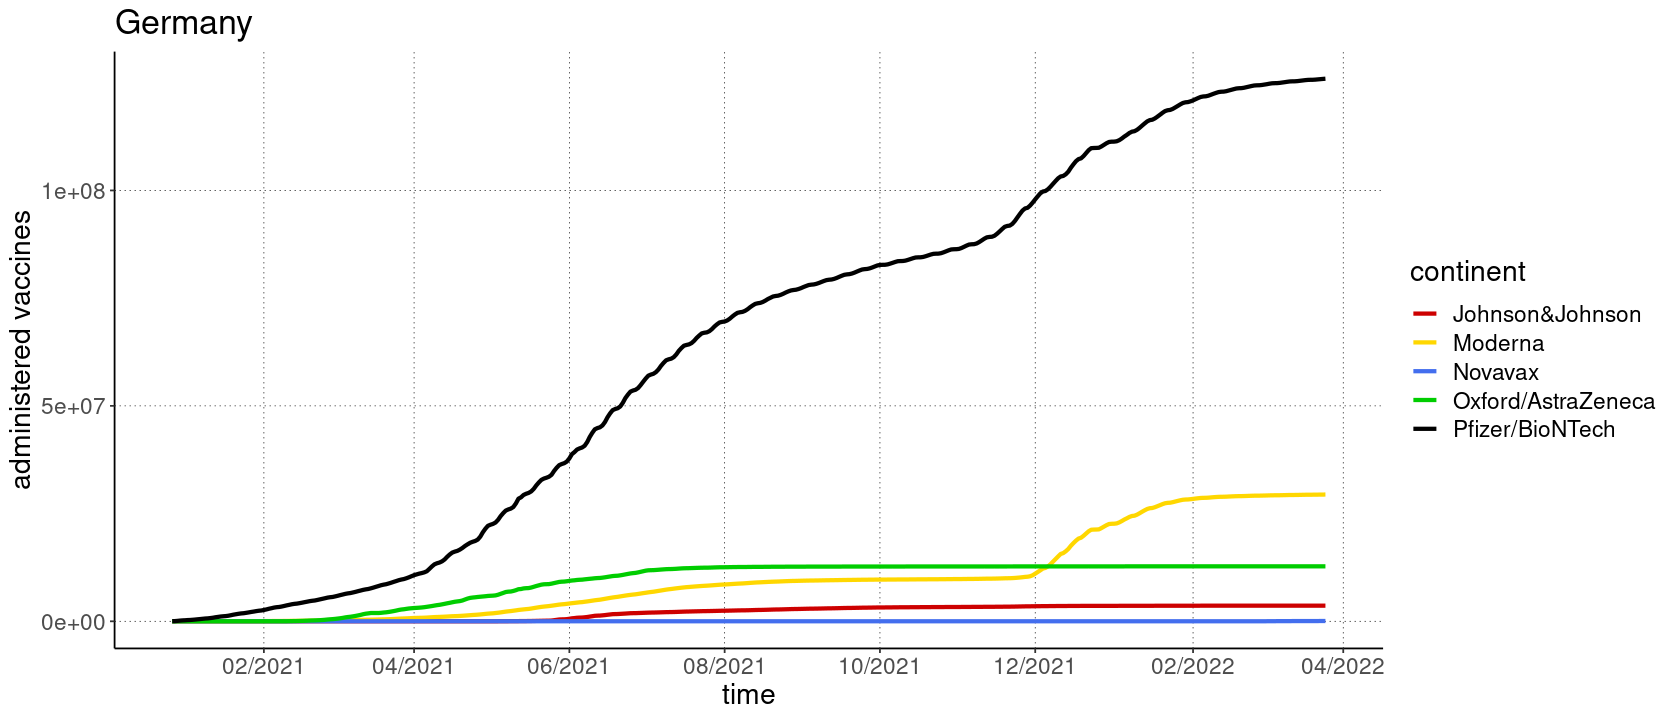

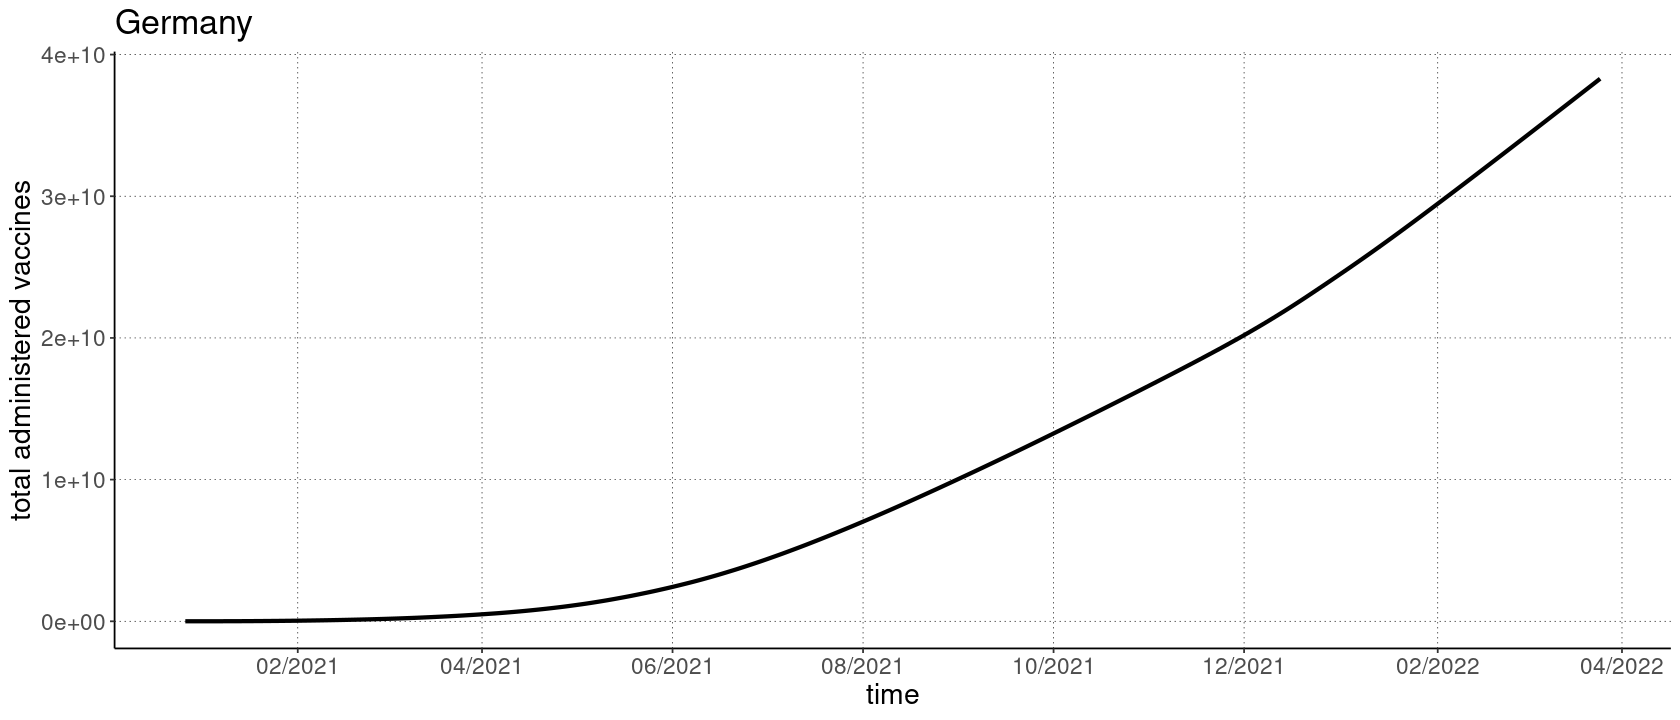

In [28]:
d4_country <- d4 %>% dplyr::filter(location == 'Germany')

options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot(data=d4_country, aes(x=date, y=total_vaccinations, color=vaccine)) +
        ggtitle("Germany") +
        scale_color_manual(name = "continent", values = c('red3','gold','royalblue2','green3','black')) +
        geom_line(size=1.2) +
        theme_classic() +
        labs(x = "time",y="administered vaccines") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

d4_all <- aggregate(d4_country$total_vaccinations, by=list(time=d4_country$date), FUN=sum)
full_days <- seq(head(d4_country, n=1)$date,tail(d4_country, n=1)$date,"1 day")
d4_all_filled <- tidyr::complete(d4_all, time = full_days, fill = list(x = 0))

options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot(data=d4_all_filled, aes(x=time, y=cumsum(x))) +
        ggtitle("Germany") +
        geom_line(size=1.2) +
        theme_classic()+
        labs(x = "time",y="total administered vaccines") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

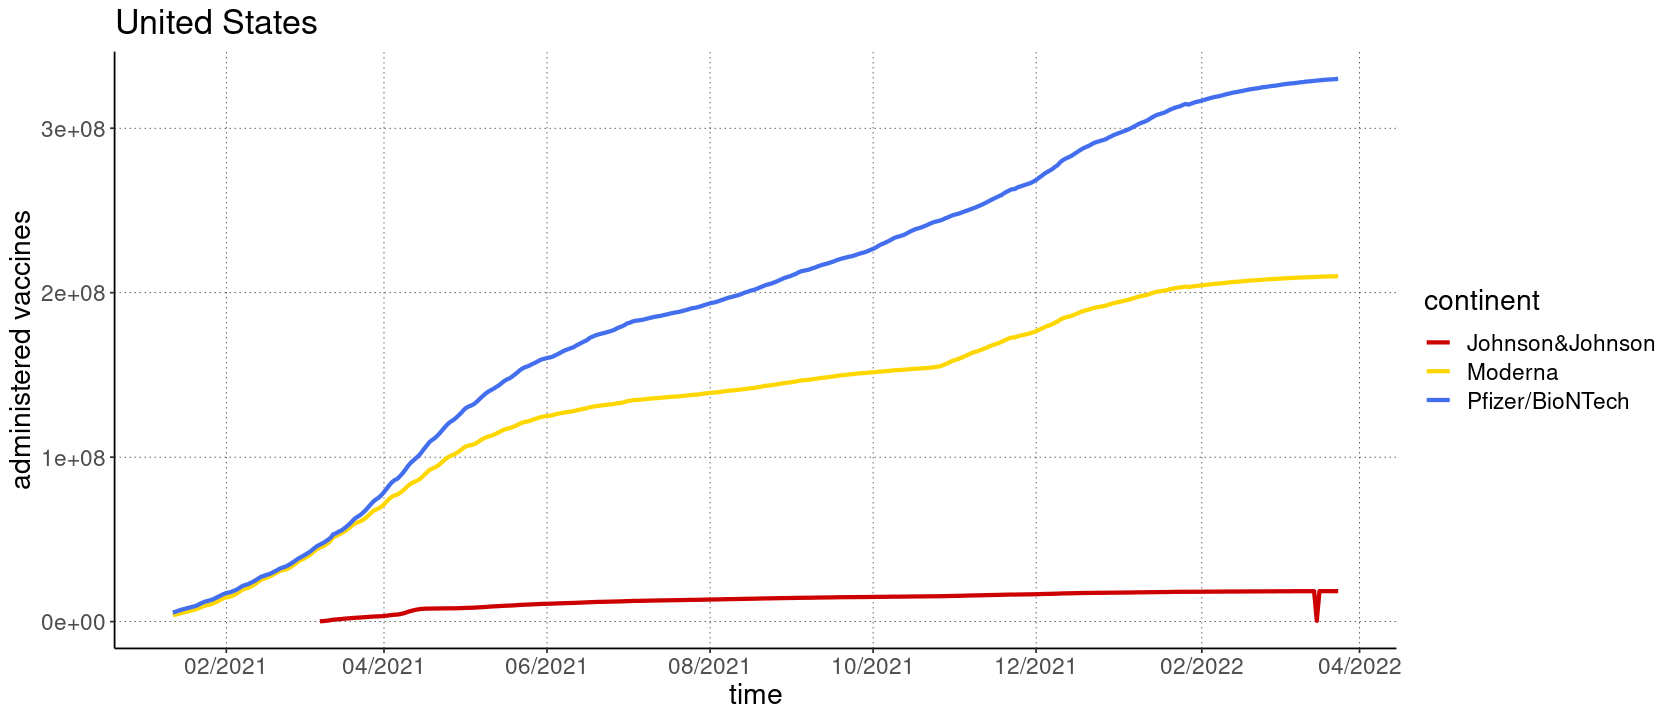

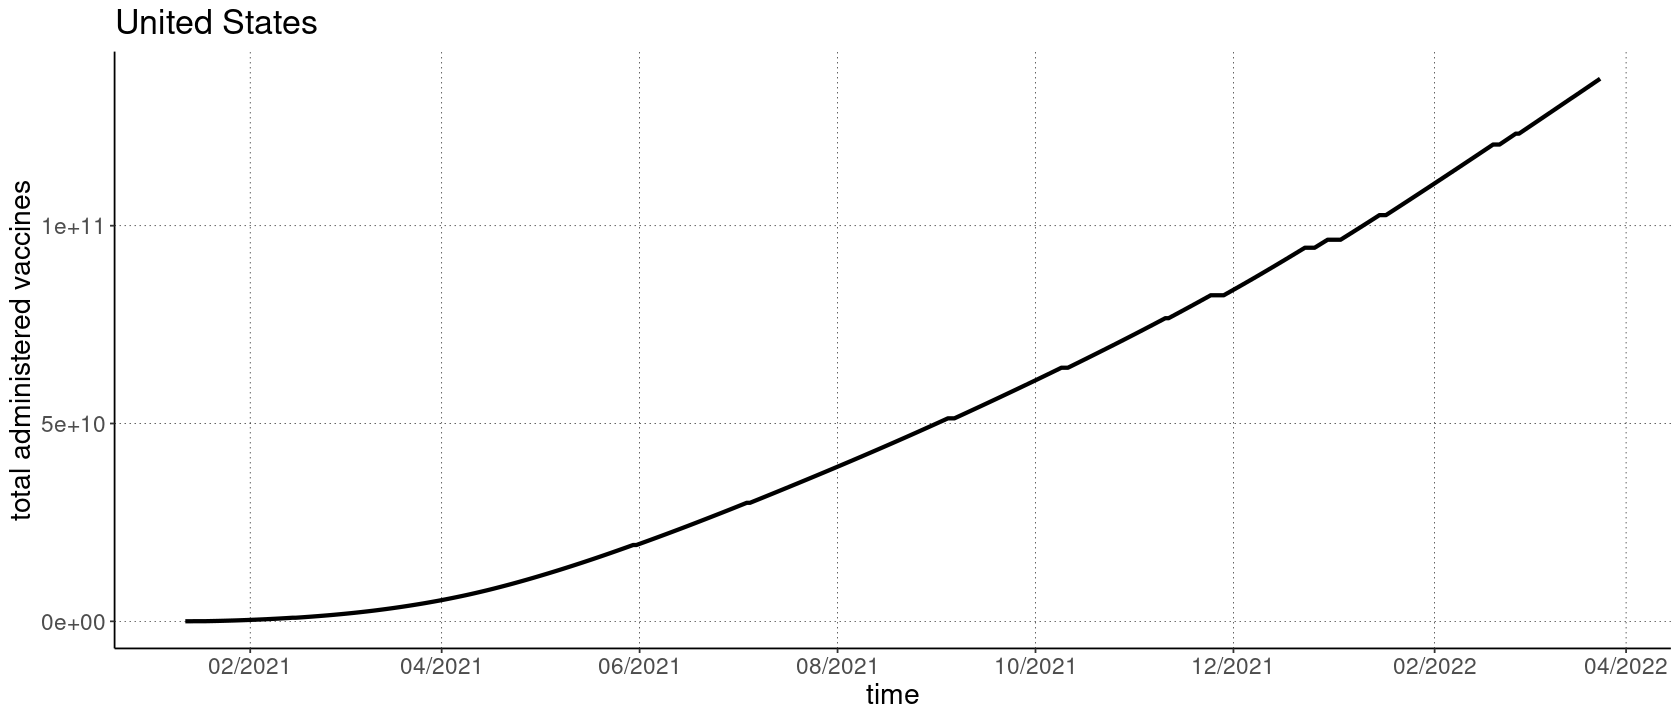

In [29]:
d4_country <- d4 %>% dplyr::filter(location == 'United States')

options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot(data=d4_country, aes(x=date, y=total_vaccinations, color=vaccine)) +
        ggtitle("United States") +
        scale_color_manual(name = "continent", values = c('red3','gold','royalblue2','green3','black')) +
        geom_line(size=1.2) +
        theme_classic()+#theme_bw() +
        labs(x = "time",y="administered vaccines") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

d4_all <- aggregate(d4_country$total_vaccinations, by=list(time=d4_country$date), FUN=sum)
full_days <- seq(head(d4_country, n=1)$date,tail(d4_country, n=1)$date,"1 day")
d4_all_filled <- tidyr::complete(d4_all, time = full_days, fill = list(x = 0))

options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot(data=d4_all_filled, aes(x=time, y=cumsum(x))) +
        ggtitle("United States") +
        geom_line(size=1.2) +
        theme_classic()+
        labs(x = "time", y = "total administered vaccines") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

***

## **EXR04b** - Covid19 vaccine data

#### **0** - IO

In [30]:
library(readr)  # to use read_csv
library(purrr)  # to use the redirect %>%
d5 <- read_csv('data/vaccinations.csv')
d5_eur <- d5 %>% dplyr::filter(location == 'Europe')
d5_eur

Rows: 90861 Columns: 16
── Column specification ─────────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): location, iso_code
dbl  (13): total_vaccinations, people_vaccinated, people_fully_vaccinated, t...
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Europe,OWID_EUR,2020-12-02,0,0,NA,NA,0,0,0.00,0.00,NA,NA,0,0,0.000
Europe,OWID_EUR,2020-12-03,0,0,NA,NA,0,0,0.00,0.00,NA,NA,0,0,0.000
Europe,OWID_EUR,2020-12-04,1,1,NA,NA,0,0,0.00,0.00,NA,NA,0,0,0.000
Europe,OWID_EUR,2020-12-05,1,1,NA,NA,0,0,0.00,0.00,NA,NA,0,0,0.000
Europe,OWID_EUR,2020-12-06,1,1,NA,NA,0,0,0.00,0.00,NA,NA,0,0,0.000
Europe,OWID_EUR,2020-12-07,2,2,NA,NA,0,0,0.00,0.00,NA,NA,0,0,0.000
Europe,OWID_EUR,2020-12-08,8,8,NA,NA,5,1,0.00,0.00,NA,NA,0,1,0.000
Europe,OWID_EUR,2020-12-09,10,10,NA,NA,1,1,0.00,0.00,NA,NA,0,1,0.000
Europe,OWID_EUR,2020-12-10,11,11,NA,NA,1,1,0.00,0.00,NA,NA,0,1,0.000


#### **1** - daily vaccinations per million

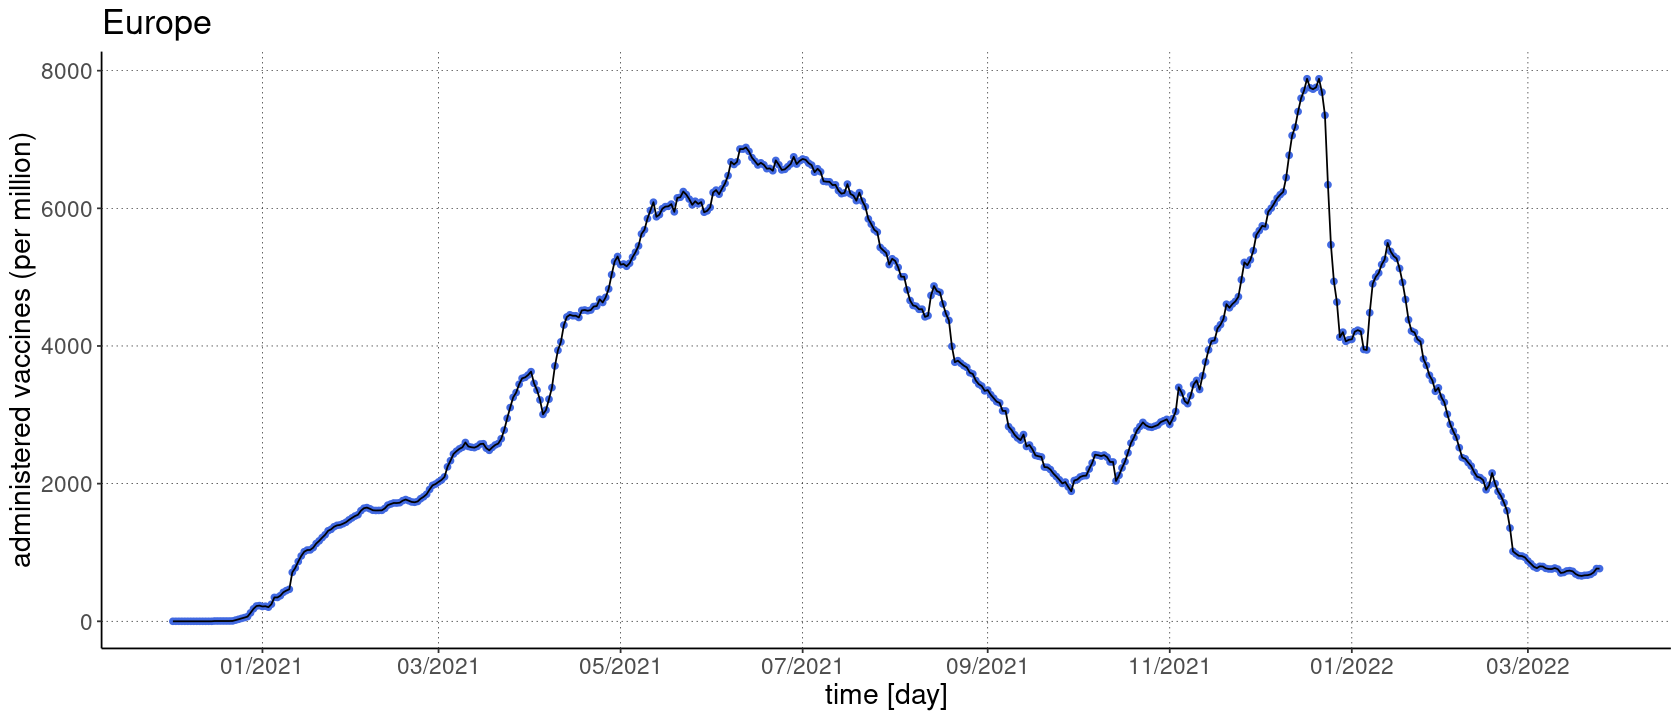

In [31]:
options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot(data=d5_eur, aes(x=date, y=daily_vaccinations_per_million)) +
        ggtitle("Europe") +
        scale_color_manual(values = c('red3','gold','royalblue2','green3','black')) +
        geom_point(color = 'royalblue') +
        geom_path() +
        theme_classic() + 
        labs(x = "time [day]",y="administered vaccines (per million)") +
        scale_x_date(date_breaks = "2 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

#### **2** - random plots

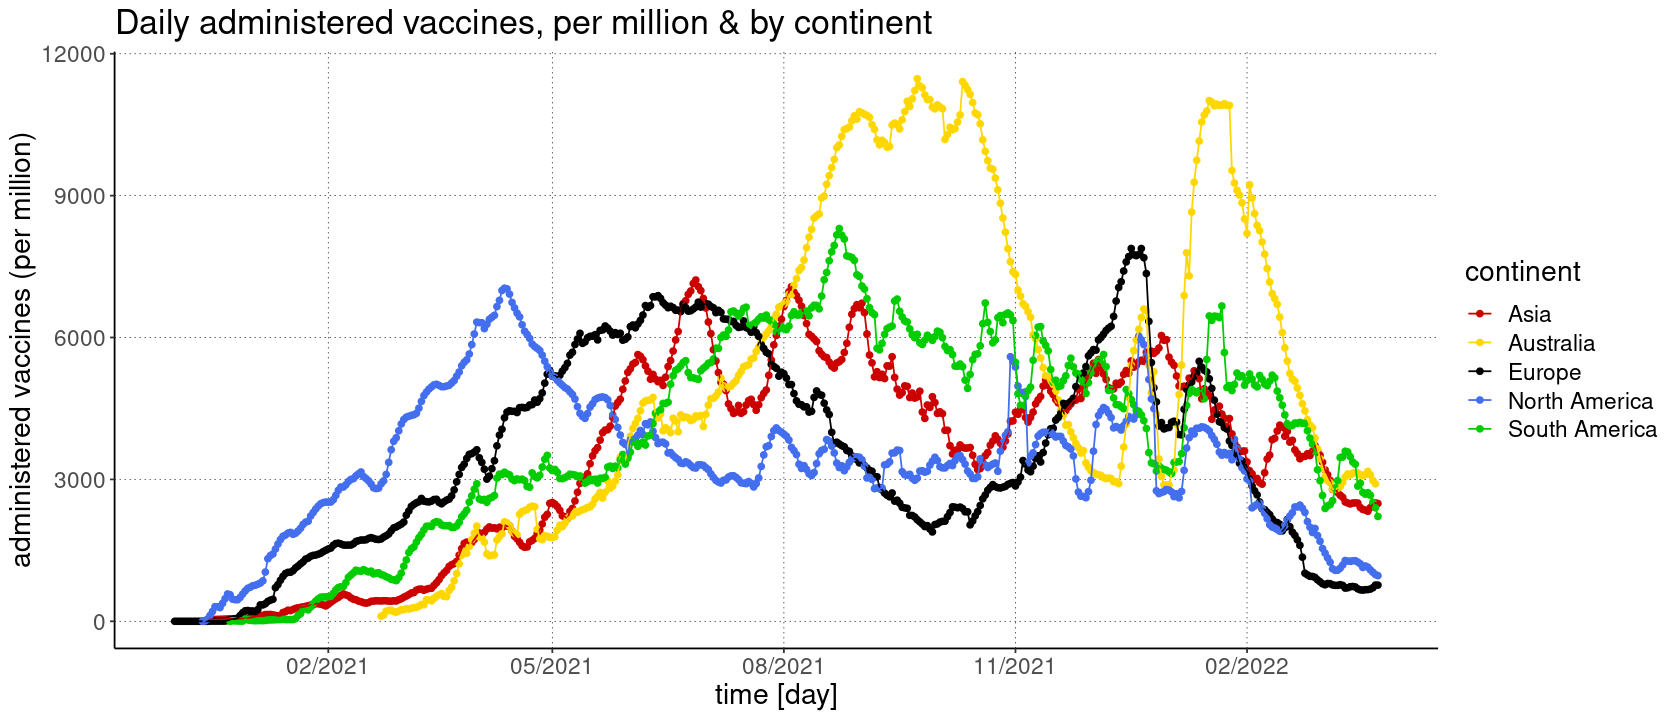

In [32]:
selection <- c('Europe', 'Asia', 'North America', 'South America', 'Australia')

d5_sel <- d5 %>% dplyr::filter(location %in% selection)

options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot( data=d5_sel, aes(x=date, y=daily_vaccinations_per_million, color=location) ) +
        ggtitle("Daily administered vaccines, per million & by continent") +
        theme_classic() +
        scale_color_manual(name = "continent", values = c('red3','gold','black','royalblue2','green3','orange')) +
        geom_point() +
        geom_path() +
        labs(x = "time [day]",y = "administered vaccines (per million)") +
        scale_x_date(date_breaks = "3 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

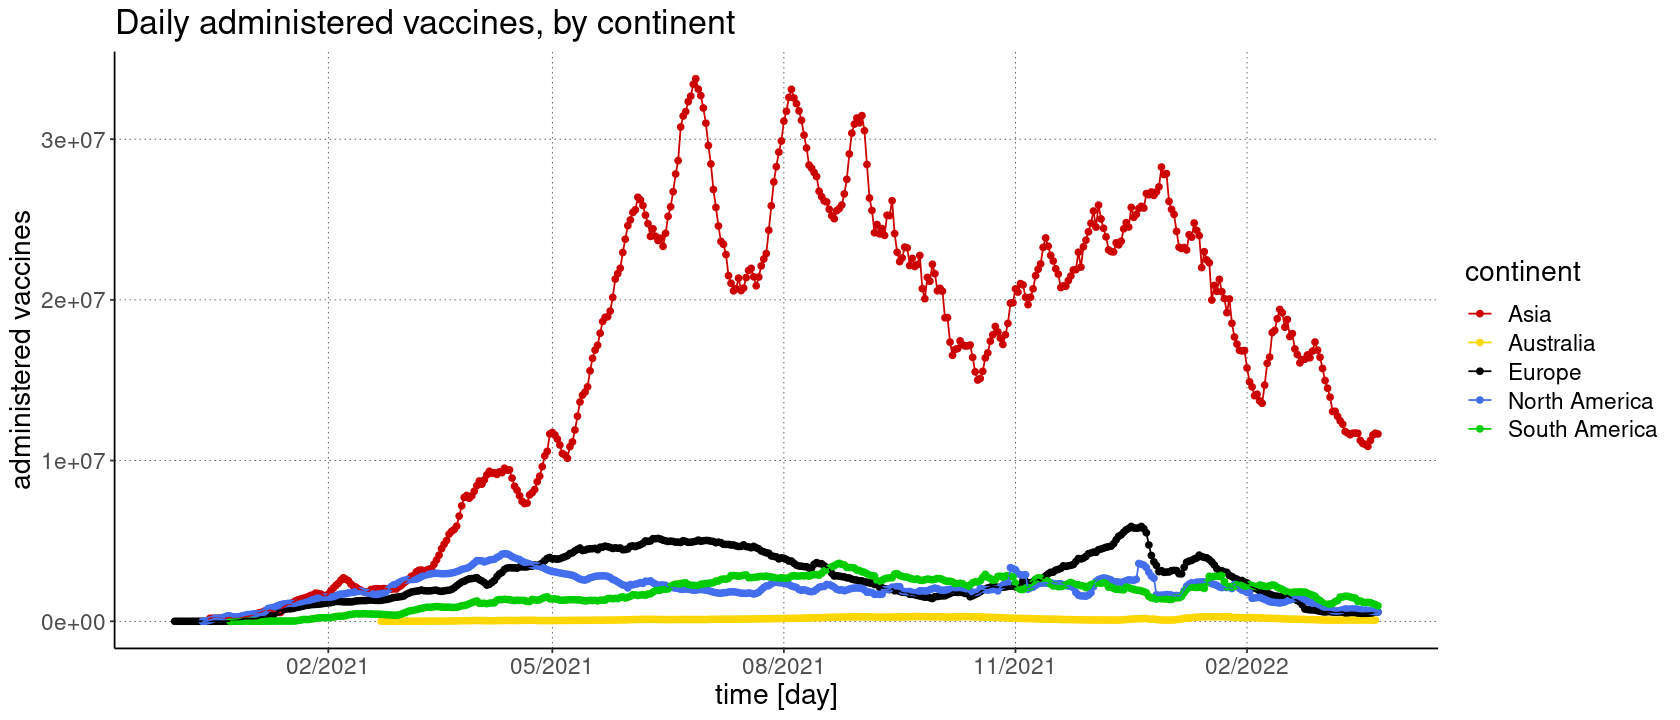

In [33]:
selection <- c('Europe', 'Asia', 'North America', 'South America', 'Australia')

d5_sel <- d5 %>% dplyr::filter(location %in% selection)

options(repr.plot.width=set_wid, repr.plot.height=set_hei)
ggplot( data=d5_sel, aes(x=date, y=daily_vaccinations, color=location) ) +
        ggtitle("Daily administered vaccines, by continent") +
        theme_classic() +
        scale_color_manual(name = "continent", values = c('red3','gold','black','royalblue2','green3','orange')) +
        geom_point() +
        geom_path() +
        labs(x = "time [day]",y = "administered vaccines") +
        scale_x_date(date_breaks = "3 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

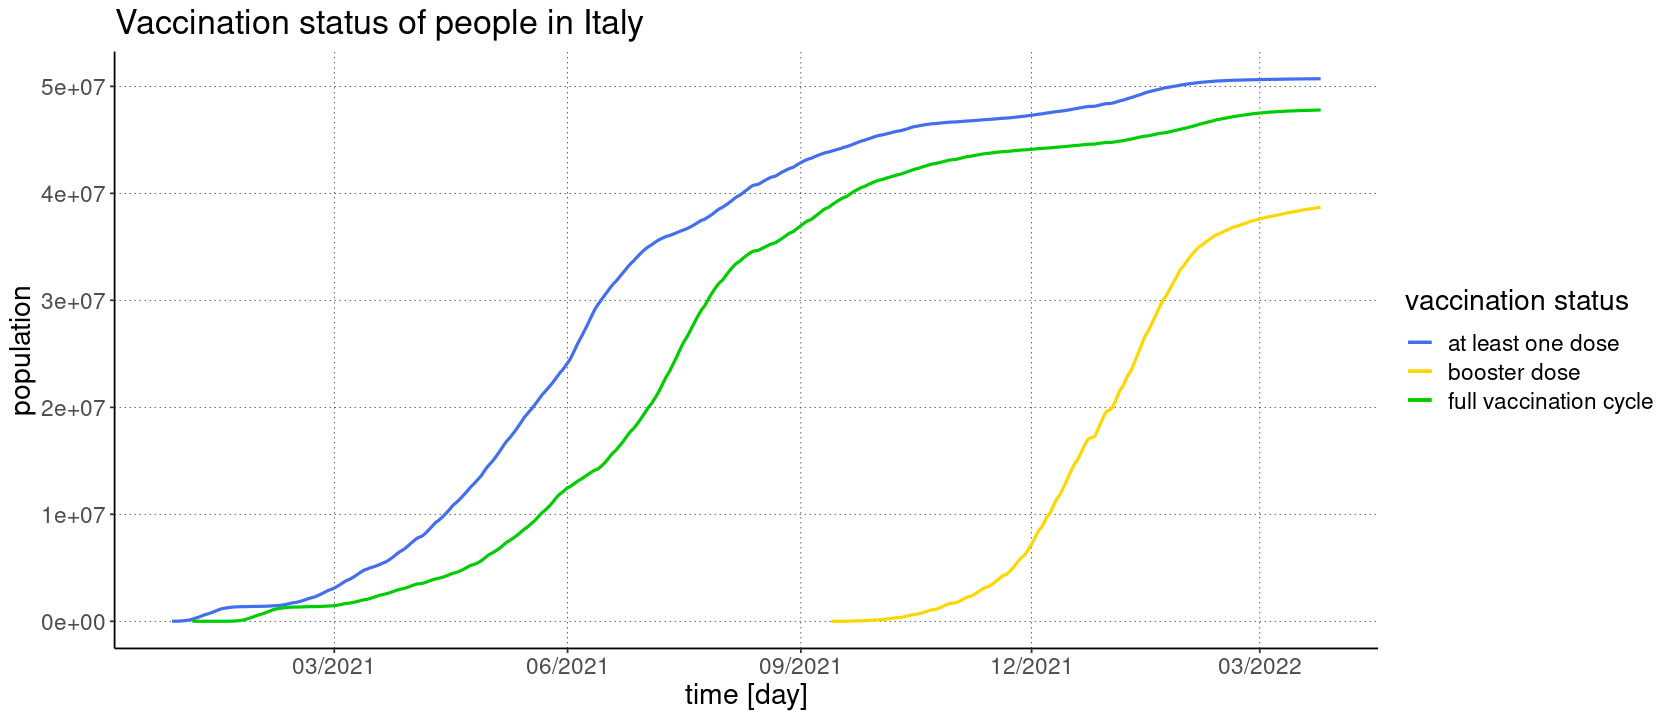

In [34]:
selection <- c('Italy')

d5_sel <- d5 %>% dplyr::filter(location %in% selection)

options(repr.plot.width=set_wid, repr.plot.height=set_hei) 
ggplot( data=d5_sel, aes(x=date ) ) +
        ggtitle("Vaccination status of people in Italy") +
        theme_classic() +
        geom_line(aes(y = people_vaccinated, colour = 'at least one dose'), size=0.9) + 
        geom_line(aes(y = people_fully_vaccinated, colour = 'full vaccination cycle'), size=0.9) + 
        geom_line(aes(y = total_boosters, colour = 'booster dose'), size=0.9) + 
        scale_color_manual(name = "vaccination status", values = c('royalblue2','gold','green3')) +
        labs(x = "time [day]",y = "population") +
        scale_x_date(date_breaks = "3 month", date_labels ="%m/%Y") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2,
                                              linetype = 3)) +
        theme(text = element_text(size = 17))

End of file.